In [1]:
import math
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Common sample rate according to the internet
sr = 44100

def get_audio(duration): 
    audio = sd.rec(
            int(duration * sr), 
            samplerate=sr, 
            channels=1, 
            dtype='float32'
        )
    sd.wait()
    return audio

### Record audio and don't say anything

In [11]:
audio = get_audio(5)
print('audio\n', audio)

audio_flat = audio[:,0]
print('\naudio_flat\n', audio_flat)

audio
 [[-6.5559983e-01]
 [-7.5950319e-01]
 [-6.8288666e-01]
 ...
 [ 8.2823407e-04]
 [ 7.7629444e-04]
 [ 7.5306243e-04]]

audio_flat
 [-6.5559983e-01 -7.5950319e-01 -6.8288666e-01 ...  8.2823407e-04
  7.7629444e-04  7.5306243e-04]


### What does audio data look like?

<Axes: ylabel='Count'>

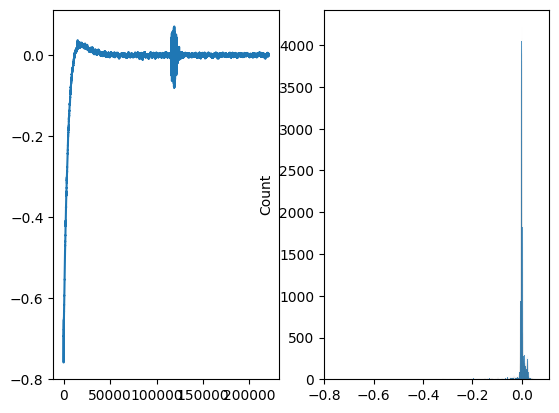

In [14]:
y = audio_flat
x = range(len(y))

fig, axes = plt.subplots(1, 2)
sns.lineplot(x=x, y=y, ax=axes[0])
sns.histplot(y, ax=axes[1])


#### Just the magnitude, np.abs the signal

<Axes: ylabel='Count'>

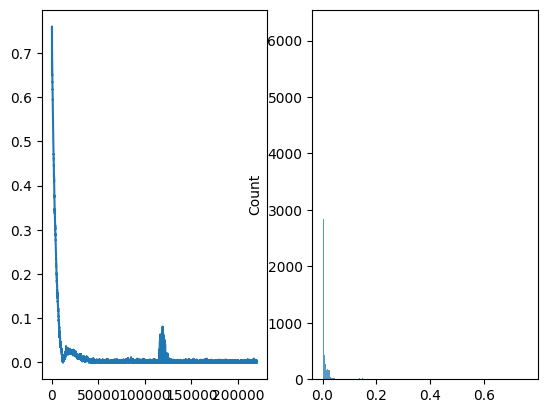

In [16]:
y = np.abs(audio_flat)
x = range(len(y))

fig, axes = plt.subplots(1, 2)
sns.lineplot(x=x, y=y, ax=axes[0])
sns.histplot(y, ax=axes[1])

#### There seems to be a spike always in the beginning of a recording so we will cut out the first 1/4 seconds
#### Also inspect the strength (sum) of the signal

In [24]:
# Cut out the first 1/4 of a second since there is always a big spike in magnitude

def inspect_audio(audio):
    amount_to_trim = int(sr / 4)
    audio_flat = audio[:,0]
    y = np.abs(audio_flat[amount_to_trim:])
    x = range(len(y))
    import seaborn as sns
    
    fig, axes = plt.subplots(1, 2)
    sns.lineplot(x=x, y=y, ax=axes[0])
    sns.histplot(y, ax=axes[1])
    print(np.std(y))
    print('sum', sum(y))
    print('sum normalized', sum(y)/duration)

0.007929607
sum 1042.0442018305753
sum normalized 104.20442018305752


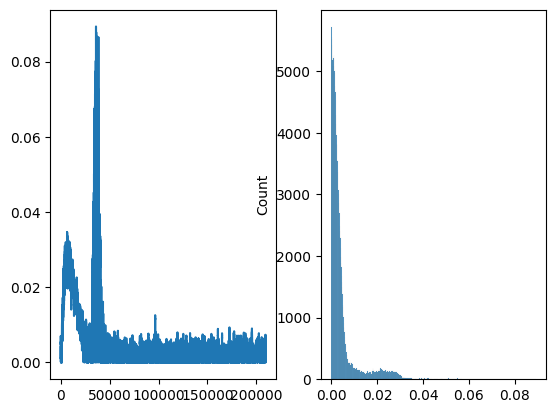

In [25]:
# Grunt in the middle of the recording
inspect_audio(get_audio(5))

0.013776939
sum 1359.7277259111956
sum normalized 135.97277259111956


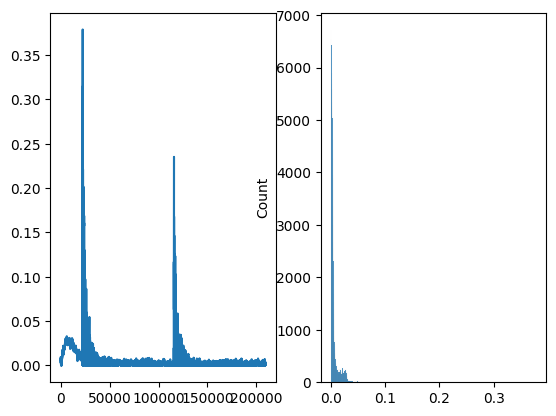

In [27]:
# Hit desk at beginning and end of recording
inspect_audio(get_audio(5))

0.0057892613
sum 818.5047814396094
sum normalized 81.85047814396094


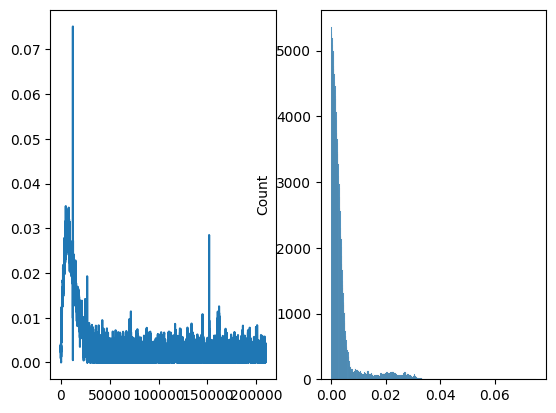

In [28]:
# whisper something incredibly quietly throughout the 5 seconds
inspect_audio(get_audio(5))

0.012967844
sum 2233.7959396730694
sum normalized 223.37959396730693


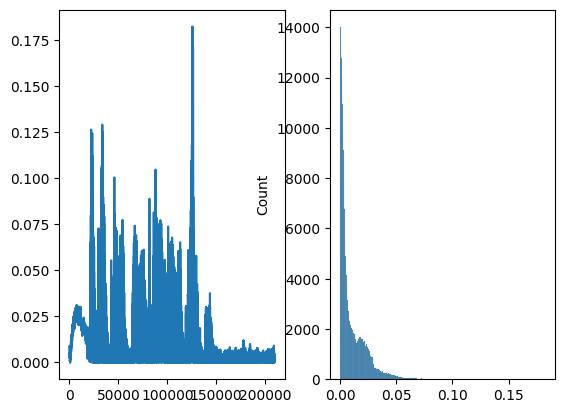

In [30]:
# ask: "write code to rename column gender to sex" in medium voice
inspect_audio(get_audio(5))

0.018081078
sum 2497.7076303189783
sum normalized 249.77076303189784


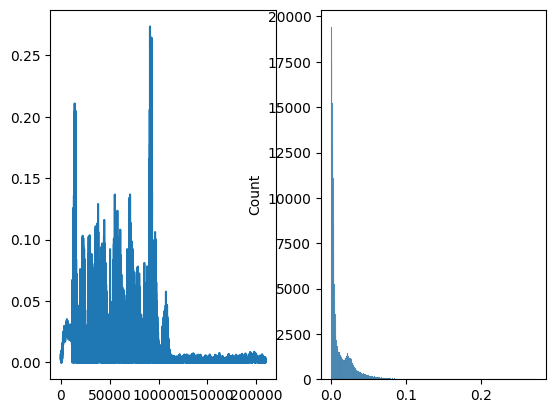

In [31]:
# ask: "write code to rename column gender to sex" in loud voice
inspect_audio(get_audio(5))

0.014469266
sum 2385.542746750022
sum normalized 238.5542746750022


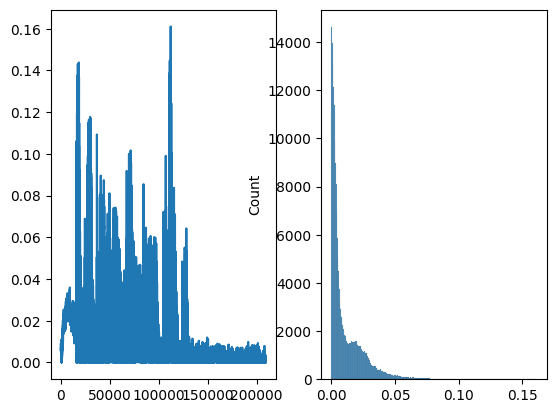

In [32]:
# ask: "write code to rename column gender to sex" with light background noise
inspect_audio(get_audio(5))

## Conclusion - use 200 as a threshold